## one hidden layer, relu, squared loss

In [61]:
import numpy as np

'''read the data'''

# Specify the path to the CSV file
path_train = 'data/MNIST_train_1000.csv'
path_test = 'data/MNIST_test_100.csv'


data_train = np.genfromtxt(path_train, delimiter=',', skip_header=0, dtype=int)
data_test = np.genfromtxt(path_test, delimiter=',', skip_header=0, dtype=int)

m,m1 = data_train.shape[0], data_test.shape[0]
ny = 10

In [62]:
'''
get the training and test split and one-hot embedding of labels 

notice that each example is a column
'''

X_train = data_train[:,1:].T/255

Y_train = np.zeros([ny,m])
Y_train[data_train[:,0],range(m)]=1


X_test = data_test[:,1:].T/255

Y_test = np.zeros([ny,m1])
Y_test[data_test[:,0],range(m1)]=1

nx = X_train.shape[0]

In [63]:
'''define mini-batches and set up the number of hidden nodes'''

batch_size = 20
nh = 100

In [64]:
'''initialise weights and biases for three layer feed forward fully connected neural network'''

rng = np.random.default_rng()
W1 = (1/nx**0.5)*rng.normal(0,1,[nx,nh])
b1 = np.zeros([nh,1])
W2 = (1/nh**0.5)*rng.normal(0,1,[nh,ny])
b2 = np.zeros([ny,1])

In [65]:
''' define a few helper functions and hyperparameters '''
def sig(x):
    return 1/(1+np.exp(-x))
def relu(x):
    return np.maximum(0,x)
def drelu(x):
    index = np.where(x>0)
    y = np.zeros_like(x)
    y[index] = 1
    return y

n_batches = int(m/batch_size)
lr = 0.05
n_epoch = 100

errors =[]

In [66]:
''' training '''



for epoch in range(n_epoch):
    error = 0
    # permute the data for SGD
    perm_idx = np.random.permutation(m)
    X_train = X_train[:,perm_idx]
    Y_train = Y_train[:,perm_idx]
    for bat in range(n_batches):
        x_batch = X_train[:,bat*batch_size:(1+bat)*batch_size]
        y_batch = Y_train[:,bat*batch_size:(1+bat)*batch_size]
        # forward pass
        z1 = np.matmul(W1.T,x_batch) + b1
        a1 = relu(z1)
        z2 = np.matmul(W2.T,a1) + b2
        a2 = sig(z2)
        # backward pass
        e = y_batch - a2
        A2 = sig(z2)*(1-sig(z2))
        S2 = - A2*e
        A1 = drelu(z1)     #sig(z1)*(1-sig(z1))
        S1 = A1*np.matmul(W2,S2)
        # gradient descent
        dW2 = np.matmul(a1,S2.T)
        db2 = np.sum(S2, axis = 1, keepdims=True)
        dW1 = np.matmul(x_batch,S1.T)
        db1 = np.sum(S1, axis = 1, keepdims=True)
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1
        # compute the error 
        error += 0.5*np.sum(e*e)
#         if (bat %100  == 0) and (epoch%100 ==0): 
#             prob = a2[y_batch*a2 !=0]
#             print("epoch:", epoch, "batch:", bat, "XE:", np.sum(-np.log(prob+0.00000001)))
    if epoch%10 == 0:
        print("Epoch:", epoch, "TSE:", error)
    errors.append(error)
        
    
    

Epoch: 0 TSE: 352.0860242247679
Epoch: 10 TSE: 20.82119801635074
Epoch: 20 TSE: 9.24257831881024
Epoch: 30 TSE: 6.383136782058274
Epoch: 40 TSE: 5.317153278358453
Epoch: 50 TSE: 4.602511364897391
Epoch: 60 TSE: 4.028251871780561
Epoch: 70 TSE: 3.8878214241748283
Epoch: 80 TSE: 3.817696775143339
Epoch: 90 TSE: 3.767959355311689


Text(0.5, 1.0, '1 hidden, ReLU, TSE')

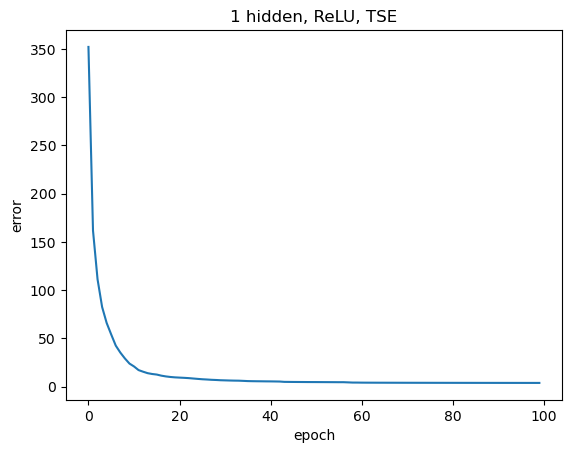

In [67]:
import matplotlib.pyplot as plt

#plt.scatter(range(len(errors)),errors)
plt.plot(errors)
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('1 hidden, ReLU, TSE')

# Test   87%

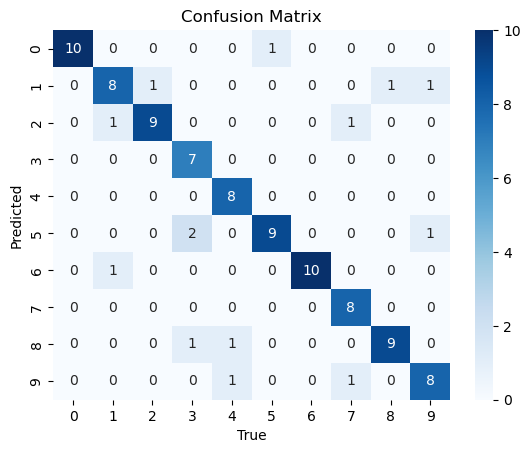

In [68]:
'''Forward pass the test data '''

z1 = np.matmul(W1.T,X_test) + b1
a1 = relu(z1)
z2 = np.matmul(W2.T,a1) + b2
a2 = sig(z2)

''' turn the output into predictions '''

pos = np.argmax(a2, axis =0)
y_pred = np.zeros_like(a2)
y_pred[pos,range(y_pred.shape[1])] = 1

''' compute the confusion matirx '''
confusion = np.zeros([10,10])
for i in range(10):
    for j in range(10):
        confusion[i,j] = np.dot(y_pred[i],Y_test[j])

import seaborn as sns

confusion_int = confusion.astype(int)

sns.heatmap(confusion_int, annot = True, fmt='d', cmap='Blues')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [69]:
np.trace(confusion)/X_test.shape[1]

0.86